In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from DrawtexDataset import DrawtexDataset
from DrawtexModel import DrawtexModel
from skimage import morphology

In [9]:
model: DrawtexModel = DrawtexModel()
model.load_state_dict(torch.load("DrawtexModel2.pth"))

model.eval()

ds: DrawtexDataset = DrawtexDataset(transforms.ToTensor())

dl = DataLoader(
    dataset=ds,
    batch_size=1,
    shuffle=True,
    num_workers=1
)


\geq


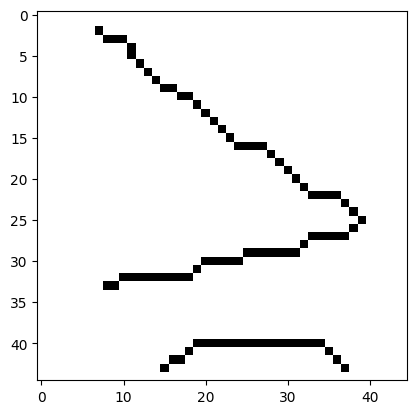

In [11]:
iter = enumerate(dl)
idx, (img, label) = next(iter)

classes = ['\\Leftarrow', '\\theta', '\\mathcal{M}', '\\mathcal{L}', '\\chi', '\\heartsuit', '\\propto',
            '\\diameter', '\\L', '\\dashv', '\\dag', 'B', '\\Vdash', '\\barwedge', '\\hbar', '\\ell', '\\o', '\\div',
            '\\prec', '\\succeq', 'D', '\\iota', '\\AA', '\\odot', '\\varpi', '+', '\\mathds{Q}', '\\varsubsetneq',
            '\\mathcal{O}', '\\lambda', '\\circlearrowright', '4', '\\sum', '\\ohm', '\\mathds{C}', '3', 'N',
            '\\Leftrightarrow', '\\lceil', '\\diamondsuit', '\\alpha', '\\Phi', '\\mathds{P}', '\\aleph', '\\mu',
            '\\geq', '\\nmid', '\\geqslant', '\\vdots', '\\epsilon', '\\flat', '\\mathcal{S}', '\\downarrow', '\\ae',
            '\\simeq', '\\rangle', '\\nRightarrow', '\\bot', '\\#', '\\backsim', '\\rightrightarrows', '\\aa',
            '\\astrosun', '5', '\\ss', 'A', '\\rightsquigarrow', '\\bowtie', 'E', 'T', '\\{', '<', '\\exists',
            '\\mathcal{D}', '\\parr', '\\pitchfork', '\\rightleftharpoons', '\\AE', '\\gamma', '\\mathcal{T}',
            '\\wp', '\\sphericalangle', '\\because', '\\ominus', 'X', '\\llbracket', '\\Re', '\\Omega', '\\models',
            '\\Longleftrightarrow', '\\int', 'R', '\\mathfrak{M}', '\\mathbb{H}', '\\neq', '\\circledast',
            '\\varphi', '\\mathscr{P}', 'S', '\\pi', '\\S', '\\triangleq', '\\preceq', '\\mathscr{F}',
            '\\mathscr{C}', '\\triangleright', '\\varkappa', 'V', '\\mathcal{B}', '\\circlearrowleft', '\\Delta',
            '\\mathscr{D}', 'H', '\\nvDash', '\\nu', '\\rfloor', '\\cdot', '\\mathcal{C}', '\\coprod',
            '\\mathcal{H}', '\\vdash', '\\uparrow', '\\leftrightarrow', '\\gtrsim', 'C', '\\Sigma', '\\backslash',
            '\\pounds', '\\mathbb{1}', '\\bullet', '\\Lambda', '\\pm', '\\lightning', '\\nexists', '\\cong',
            '\\mathcal{P}', '\\male', '\\vDash', '\\boxtimes', '\\mathscr{E}', '\\mathcal{N}', '\\leftmoon',
            '\\rrbracket', '\\between', '\\Rightarrow', 'Z', '\\ddots', '\\lhd', '\\subset', '\\subseteq',
            '\\rightarrow', '\\sun', '\\infty', '\\mathscr{A}', '\\celsius', '\\omega', '\\nsubseteq', '\\mathds{1}',
            'P', '\\nabla', '\\tau', '1', '\\uplus', '\\otimes', '\\cup', 'G', '\\oplus', '\\%', '\\Psi',
            '\\blacktriangleright', 'W', '\\mathcal{U}', '\\mathscr{L}', '\\psi', '\\top', '\\oint',
            '\\rightharpoonup', '\\|', '\\subsetneq', '\\beta', '\\varrho', '\\mars', '\\fint', '6', '\\}', '\\in',
            '\\boxplus', '\\ast', '\\mathcal{G}', '\\$', '\\preccurlyeq', '\\varoiint', '\\iddots', '-', '\\vee',
            '\\rightleftarrows', '\\square', '\\mathfrak{X}', '\\mp', '\\twoheadrightarrow', '\\equiv', '\\searrow',
            '\\sqcap', '\\fullmoon', '\\supset', '\\prod', '\\not\\equiv', 'F', '\\Gamma', '\\sqsubseteq',
            '\\langle', '\\supseteq', '\\sim', '\\clubsuit', '\\mapsto', '8', '\\multimap', '\\circledcirc',
            '\\mathcal{F}', '\\mathfrak{S}', '\\mathds{Z}', '\\leadsto', '\\amalg', '\\zeta', '\\cap', '\\mathds{R}',
            'Q', '[', '\\mathds{N}', 'J', '\\therefore', '\\mathscr{S}', '0', '\\varepsilon', '\\hookrightarrow',
            '\\mathcal{R}', '\\ltimes', '\\diamond', '\\triangleleft', ']', '\\checkmark', '\\dots', '\\rho',
            '\\circledR', '\\times', '\\mathcal{E}', '\\leftarrow', '\\upharpoonright', '\\trianglelefteq',
            '\\nearrow', '\\mathcal{A}', '\\wr', '\\prime', '\\sqcup', '\\succ', '\\parallel', '\\leqslant',
            '\\Bowtie', '\\partial', '\\rceil', 'O', '\\forall', '\\emptyset', '\\circ', '\\venus', '\\sharp',
            '\\angle', 'Y', '\\boxdot', '2', 'L', '\\neg', '\\oiint', '\\sigma', '\\Pi', '\\mathds{E}', '\\female',
            '\\leq', '\\approx', '\\lfloor', '\\degree', '\\sqrt{}', 'I', '\\notin', '\\kappa', '\\ni',
            '\\guillemotleft', '\\blacksquare', '\\gtrless', '>', '\\delta', '\\Theta', '\\doteq', '\\nrightarrow',
            '\\wedge', '/', '|', '7', '\\frown', 'U', '\\phi', '\\lesssim', '\\varnothing', '\\Im', '\\copyright',
            'M', '\\xi', '\\star', '\\mathfrak{A}', '\\curvearrowright', '\\mathcal{X}', '\\&', '\\vartheta',
            '\\perp', '\\mathcal{Z}', '\\eta', '\\mapsfrom', '\\asymp', '\\rtimes', '\\O', '\\lozenge',
            '\\Downarrow', '\\mathscr{H}', '\\Xi', 'K', '9']

lab_map = {'\\Leftarrow': 0, '\\theta': 1, '\\mathcal{M}': 2, '\\mathcal{L}': 3, '\\chi': 4, '\\heartsuit': 5,
            '\\propto': 6, '\\diameter': 7, '\\L': 8, '\\dashv': 9, '\\dag': 10, 'B': 11, '\\Vdash': 12,
            '\\barwedge': 13, '\\hbar': 14, '\\ell': 15, '\\o': 16, '\\div': 17, '\\prec': 18, '\\succeq': 19,
            'D': 20, '\\iota': 21, '\\AA': 22, '\\odot': 23, '\\varpi': 24, '+': 25, '\\mathds{Q}': 26,
            '\\varsubsetneq': 27, '\\mathcal{O}': 28, '\\lambda': 29, '\\circlearrowright': 30, '4': 31, '\\sum': 32,
            '\\ohm': 33, '\\mathds{C}': 34, '3': 35, 'N': 36, '\\Leftrightarrow': 37, '\\lceil': 38,
            '\\diamondsuit': 39, '\\alpha': 40, '\\Phi': 41, '\\mathds{P}': 42, '\\aleph': 43, '\\mu': 44,
            '\\geq': 45, '\\nmid': 46, '\\geqslant': 47, '\\vdots': 48, '\\epsilon': 49, '\\flat': 50,
            '\\mathcal{S}': 51, '\\downarrow': 52, '\\ae': 53, '\\simeq': 54, '\\rangle': 55, '\\nRightarrow': 56,
            '\\bot': 57, '\\#': 58, '\\backsim': 59, '\\rightrightarrows': 60, '\\aa': 61, '\\astrosun': 62, '5': 63,
            '\\ss': 64, 'A': 65, '\\rightsquigarrow': 66, '\\bowtie': 67, 'E': 68, 'T': 69, '\\{': 70, '<': 71,
            '\\exists': 72, '\\mathcal{D}': 73, '\\parr': 74, '\\pitchfork': 75, '\\rightleftharpoons': 76,
            '\\AE': 77, '\\gamma': 78, '\\mathcal{T}': 79, '\\wp': 80, '\\sphericalangle': 81, '\\because': 82,
            '\\ominus': 83, 'X': 84, '\\llbracket': 85, '\\Re': 86, '\\Omega': 87, '\\models': 88,
            '\\Longleftrightarrow': 89, '\\int': 90, 'R': 91, '\\mathfrak{M}': 92, '\\mathbb{H}': 93, '\\neq': 94,
            '\\circledast': 95, '\\varphi': 96, '\\mathscr{P}': 97, 'S': 98, '\\pi': 99, '\\S': 100,
            '\\triangleq': 101, '\\preceq': 102, '\\mathscr{F}': 103, '\\mathscr{C}': 104, '\\triangleright': 105,
            '\\varkappa': 106, 'V': 107, '\\mathcal{B}': 108, '\\circlearrowleft': 109, '\\Delta': 110,
            '\\mathscr{D}': 111, 'H': 112, '\\nvDash': 113, '\\nu': 114, '\\rfloor': 115, '\\cdot': 116,
            '\\mathcal{C}': 117, '\\coprod': 118, '\\mathcal{H}': 119, '\\vdash': 120, '\\uparrow': 121,
            '\\leftrightarrow': 122, '\\gtrsim': 123, 'C': 124, '\\Sigma': 125, '\\backslash': 126, '\\pounds': 127,
            '\\mathbb{1}': 128, '\\bullet': 129, '\\Lambda': 130, '\\pm': 131, '\\lightning': 132, '\\nexists': 133,
            '\\cong': 134, '\\mathcal{P}': 135, '\\male': 136, '\\vDash': 137, '\\boxtimes': 138,
            '\\mathscr{E}': 139, '\\mathcal{N}': 140, '\\leftmoon': 141, '\\rrbracket': 142, '\\between': 143,
            '\\Rightarrow': 144, 'Z': 145, '\\ddots': 146, '\\lhd': 147, '\\subset': 148, '\\subseteq': 149,
            '\\rightarrow': 150, '\\sun': 151, '\\infty': 152, '\\mathscr{A}': 153, '\\celsius': 154, '\\omega': 155,
            '\\nsubseteq': 156, '\\mathds{1}': 157, 'P': 158, '\\nabla': 159, '\\tau': 160, '1': 161, '\\uplus': 162,
            '\\otimes': 163, '\\cup': 164, 'G': 165, '\\oplus': 166, '\\%': 167, '\\Psi': 168,
            '\\blacktriangleright': 169, 'W': 170, '\\mathcal{U}': 171, '\\mathscr{L}': 172, '\\psi': 173,
            '\\top': 174, '\\oint': 175, '\\rightharpoonup': 176, '\\|': 177, '\\subsetneq': 178, '\\beta': 179,
            '\\varrho': 180, '\\mars': 181, '\\fint': 182, '6': 183, '\\}': 184, '\\in': 185, '\\boxplus': 186,
            '\\ast': 187, '\\mathcal{G}': 188, '\\$': 189, '\\preccurlyeq': 190, '\\varoiint': 191, '\\iddots': 192,
            '-': 193, '\\vee': 194, '\\rightleftarrows': 195, '\\square': 196, '\\mathfrak{X}': 197, '\\mp': 198,
            '\\twoheadrightarrow': 199, '\\equiv': 200, '\\searrow': 201, '\\sqcap': 202, '\\fullmoon': 203,
            '\\supset': 204, '\\prod': 205, '\\not\\equiv': 206, 'F': 207, '\\Gamma': 208, '\\sqsubseteq': 209,
            '\\langle': 210, '\\supseteq': 211, '\\sim': 212, '\\clubsuit': 213, '\\mapsto': 214, '8': 215,
            '\\multimap': 216, '\\circledcirc': 217, '\\mathcal{F}': 218, '\\mathfrak{S}': 219, '\\mathds{Z}': 220,
            '\\leadsto': 221, '\\amalg': 222, '\\zeta': 223, '\\cap': 224, '\\mathds{R}': 225, 'Q': 226, '[': 227,
            '\\mathds{N}': 228, 'J': 229, '\\therefore': 230, '\\mathscr{S}': 231, '0': 232, '\\varepsilon': 233,
            '\\hookrightarrow': 234, '\\mathcal{R}': 235, '\\ltimes': 236, '\\diamond': 237, '\\triangleleft': 238,
            ']': 239, '\\checkmark': 240, '\\dots': 241, '\\rho': 242, '\\circledR': 243, '\\times': 244,
            '\\mathcal{E}': 245, '\\leftarrow': 246, '\\upharpoonright': 247, '\\trianglelefteq': 248,
            '\\nearrow': 249, '\\mathcal{A}': 250, '\\wr': 251, '\\prime': 252, '\\sqcup': 253, '\\succ': 254,
            '\\parallel': 255, '\\leqslant': 256, '\\Bowtie': 257, '\\partial': 258, '\\rceil': 259, 'O': 260,
            '\\forall': 261, '\\emptyset': 262, '\\circ': 263, '\\venus': 264, '\\sharp': 265, '\\angle': 266,
            'Y': 267, '\\boxdot': 268, '2': 269, 'L': 270, '\\neg': 271, '\\oiint': 272, '\\sigma': 273, '\\Pi': 274,
            '\\mathds{E}': 275, '\\female': 276, '\\leq': 277, '\\approx': 278, '\\lfloor': 279, '\\degree': 280,
            '\\sqrt{}': 281, 'I': 282, '\\notin': 283, '\\kappa': 284, '\\ni': 285, '\\guillemotleft': 286,
            '\\blacksquare': 287, '\\gtrless': 288, '>': 289, '\\delta': 290, '\\Theta': 291, '\\doteq': 292,
            '\\nrightarrow': 293, '\\wedge': 294, '/': 295, '|': 296, '7': 297, '\\frown': 298, 'U': 299,
            '\\phi': 300, '\\lesssim': 301, '\\varnothing': 302, '\\Im': 303, '\\copyright': 304, 'M': 305,
            '\\xi': 306, '\\star': 307, '\\mathfrak{A}': 308, '\\curvearrowright': 309, '\\mathcal{X}': 310,
            '\\&': 311, '\\vartheta': 312, '\\perp': 313, '\\mathcal{Z}': 314, '\\eta': 315, '\\mapsfrom': 316,
            '\\asymp': 317, '\\rtimes': 318, '\\O': 319, '\\lozenge': 320, '\\Downarrow': 321, '\\mathscr{H}': 322,
            '\\Xi': 323, 'K': 324, '9': 325}

out: torch.Tensor = model(img)
plt.imshow(img[0][0], cmap="gray")
_, pred = torch.max(out, 1)

print(classes[pred])


In [ ]:
img = cv2.imread("../data/HASYv2/hasy-data/v2-00023.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.threshold(img, 128, 1, cv2.THRESH_BINARY)[1]
img = cv2.resize(img, (45, 45))
# Convert image shape to have 1 channel (standard image format)
img = img.reshape(45, 45, 1)
img ^= 1
img = morphology.skeletonize(img)
img ^= 1
ts = transforms.ToTensor()
img: torch.Tensor = ts(img)
img = img.unsqueeze(0)

out = model(img)
_, pred = torch.max(out, 1)
print(classes[pred])
plt.imshow(img[0][0], cmap="gray")